# Heart Disease - Lab 1
Martin Garcia, Joanna Duran, Daniel Byrne / test

In [19]:
#packages
import pandas as pd
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#read the csv file
df = pd.read_csv('heart.csv')

### Business Understanding

The Cleveland Heart Disease Database, CHDD, produced in partnership with the V.A. Medical Center in Long Beach and
Cleveland Clinic Foundation has grown to be a popular repository of heart disease specific measurable attributes.  The [machine learning repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) hosting the dataset boasts 58 paper's citing it.

The CHDD datbase has been used as the basis of multiple models of various complexity since its creation in 1998.  The original model using logistic regression boasted a 77% accuracy in predicting heart disease.  Subsequent models have pushed that accuracy metric up past 80% and to as high as 89% in one model. 

### Data Meaning Type

The original CHDD dataset contains 76 attributes, but most published experiments, including the original, rely only 13 attributes from the dataset. We use data mining techniques to attempt to build a model to that trys to predict coronary artery disease, CAD, in patients from the 13 commonly used attribute from the dataset. A description of the data points used in this model is in Table 1.

The data used to derive the model orginated from data collected from 303 consecutive patients slated to recieve a coronary angiography at the Cleveland Clinic between May 1981 and September 1984. None of the patients had a prior history or evidence of prior heart attack or known vascular or cardiomyopathic disease.  Each patient provided a medical history and underwent a physical examination, provided electrocardiogram at rest, and provided a serum cholesterol fasting blood sugar measurement as part of a routine evaluation.

Historical data were recorded and coded without knowledge of the additional test data. The patients also underwent 3 noninvasive tests, and exercise electrocardiogram, a thallium scintigraphy and a cardiac fluoroscopy.  The results of these tests were not interpreted until after the angiogram was read.

##### Table 1 - Data Parameter Descriptions
 
| Data     | Description                                        | Attributes / Attribute Type / Scale / Values                                |
|----------|----------------------------------------------------|---------------------------------------------|
| Age      | Age in years                                       | range 29 - 77 / numeric - ratio /  continuous /  int64
                                        | sex      | Gender                                             | Male: 1 Female: 0 / categorical - nominal  / discrete + binary / int64                       |
| cp       | Angina Categories / chest pain type                             | Typical:0, Atypical:1, Non-Anginal:2, Asymptomatic:3 / categorical-ordinal / discrete|/ int64
| trestbps | Resting Blood Pressure (mm Hg - unit of pressure )                             |    range 94- 200 / numeric -  / continuous / int64                                       | 
| chol     | Serum Cholestoral and Triglcerides (mg/dl - milligrams per deciliter)               |     range 126 - 564 / numeric / continuous / int64                                        |
| fbs      | Fasting Blood Sugar > 120 (mg/dl)                        |   True:1 False:0 / discrete + binary / int64                                          |
| restecg  | Resting Electrocardiogram                          |   Normal: 0, Abnormal:1, 2:Probable Ventricular Hypertrophy / thickening heart walls                                          |
| thalach  | Maximum Heart Rate                                 |   range 71- 202 /   numeric / continuous / int64                                       |
| exang    | Exercise Induced Angina                            | Yes: 1,  No: 0  / categorical-   / discrete + binary                         |
| oldpeak  | ST Depression Induced by Exercise Relative to Rest |   range 0 - 6.2 / numeric / float64                                         |
| slope    | Slope of the Peak Exercise ST Segment              |   Upsloping:1, Flat:2, Downsloping:3                                           |
| ca       | Number of Major Vessels Colored by Flourosopy      | Count with range 0-3                        |
| thal     | Thalassemia - blood disorder, less hemoglobin and red blood counts                                       |  3: Normal, 6: fixed defect, 7:reversable defect                                           |
| target   | Heart Disease Present in Patient                   | Yes: 1,  No: 0   /   discrete+ binary                         |



### Data Quality

In [5]:
# count the number of missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#heatmap for missing values
sns.heatmap(df.isnull())

NameError: name 'sns' is not defined

Upon initial overview the dataset seemed very robust since every row has an entry for every attribute. While examining the data there seems to be some discrepancies in the descriptions provided from Kaggle as well as the original data source. 
For the category "slope", the provided description "Upsloping:1, Flat:2, Downsloping:3" does not match the data set values of "0,1,2".
For the category "ca", the provided description "Count with range 0-3" does not match the data set values of "0,1,2,3,4".
For the category "thal", the provided description "3: Normal, 6: fixed defect, 7:reversable defect" does not match the data set values of "0,1,2,3".
We investigated the Kaggle discussion boards to see if anybody else had answers. Some of the questions were also asked but no resolution was given.

### Simple Statistics

In [6]:

df.info()

#Summary statistics for all observations/patients
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target
0    138
1    165
Name: target, dtype: int64


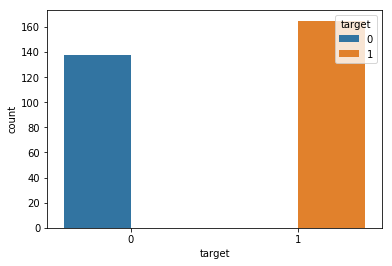

In [10]:
# Aggregate by heart disease presence, 1 = yes 0 = no
df_grouped = df.groupby(by='target')
print (df_grouped.target.count())
sns.countplot(x='target',hue='target',data=df)

target  sex
0       0       24
        1      114
1       0       72
        1       93
Name: target, dtype: int64


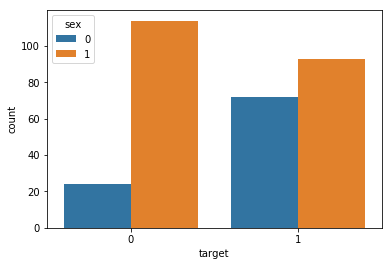

In [9]:
#grouped further by sex, 1 = male, 0 = female

df_grouped = df.groupby(by=['target','sex'])
print (df_grouped.target.count())
sns.countplot(x='target',hue='sex',data=df)

In [9]:
#summary statistics broken down by presence of heart disease and gender, 1 = male, 0 = female
df_grouped.describe()

age                                                        \
            count       mean        std   min    25%   50%    75%   max   
target sex                                                                
0      0     24.0  59.041667   4.964913  43.0  56.75  60.5  62.00  66.0   
       1    114.0  56.087719   8.385155  35.0  51.00  57.5  61.00  77.0   
1      0     72.0  54.555556  10.265337  34.0  46.00  54.0  63.25  76.0   
       1     93.0  50.903226   8.682897  29.0  44.00  52.0  57.00  70.0   

               ca            ...   thalach        trestbps              \
            count      mean  ...       75%    max    count        mean   
target sex                   ...                                         
0      0     24.0  1.291667  ...    154.75  174.0     24.0  146.125000   
       1    114.0  1.140351  ...    156.00  195.0    114.0  131.929825   
1      0     72.0  0.305556  ...    167.25  192.0     72.0  128.736111   
       1     93.0  0.408602  ...    175.00  202.0     93.0  129.741935   

                                                          
                  std    min    25%    50%    75%    max  
target sex                                                
0      0    21.436078  108.0  130.0  140.0  152.5  200.0  
       1    17.217361  100.0  120.0  130.0  140.0  192.0  
1      0    16.536765   94.0  119.5  130.0  140.0  180.0  
       1    15.955715   94.0  120.0  130.0  140.0  178.0  

[4 rows x 96 columns]

Average age of those diagnosed with heart disease vary by gender, 54 and 50.

### Visualize Attributes

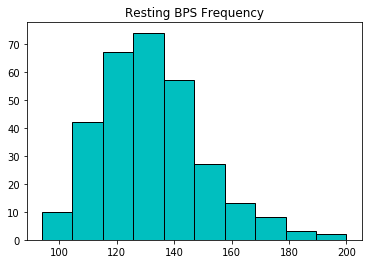

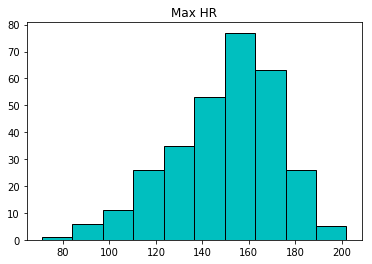

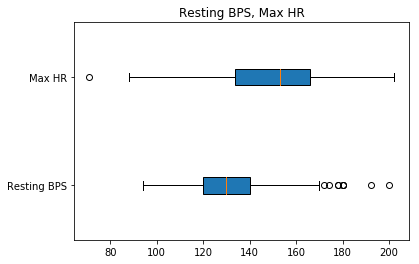

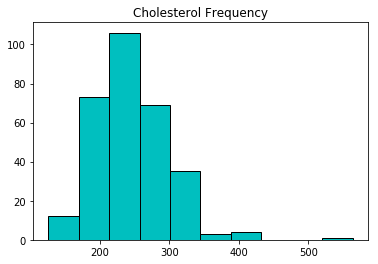

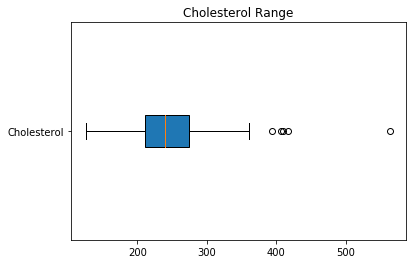

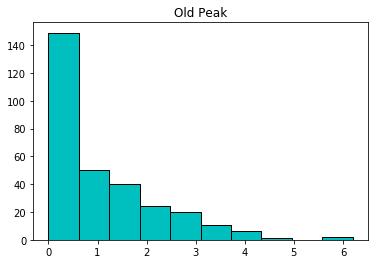

In [10]:
#plots
def plotdist(df):
    plt.hist(df.trestbps, color='c',edgecolor='black')
    plt.title('Resting BPS Frequency')
    plt.show()
    
    plt.hist(df.thalach, color='c',edgecolor='black')
    plt.title('Max HR')
    plt.show()
    
    plt.boxplot([df.trestbps, df.thalach], patch_artist=True,vert=0,labels=['Resting BPS', 'Max HR'])
    plt.title('Resting BPS, Max HR')
    plt.show()
    
    plt.hist(df.chol, color='c',edgecolor='black')
    plt.title('Cholesterol Frequency')
    plt.show()
    
    plt.boxplot([df.chol], patch_artist=True,vert=0,labels=['Cholesterol'])
    plt.title('Cholesterol Range')
    plt.show()
    
    plt.hist(df.oldpeak, color='c',edgecolor='black')
    plt.title('Old Peak')
    plt.show()
    
plotdist(df)

### Explore Joint Attributes and Class

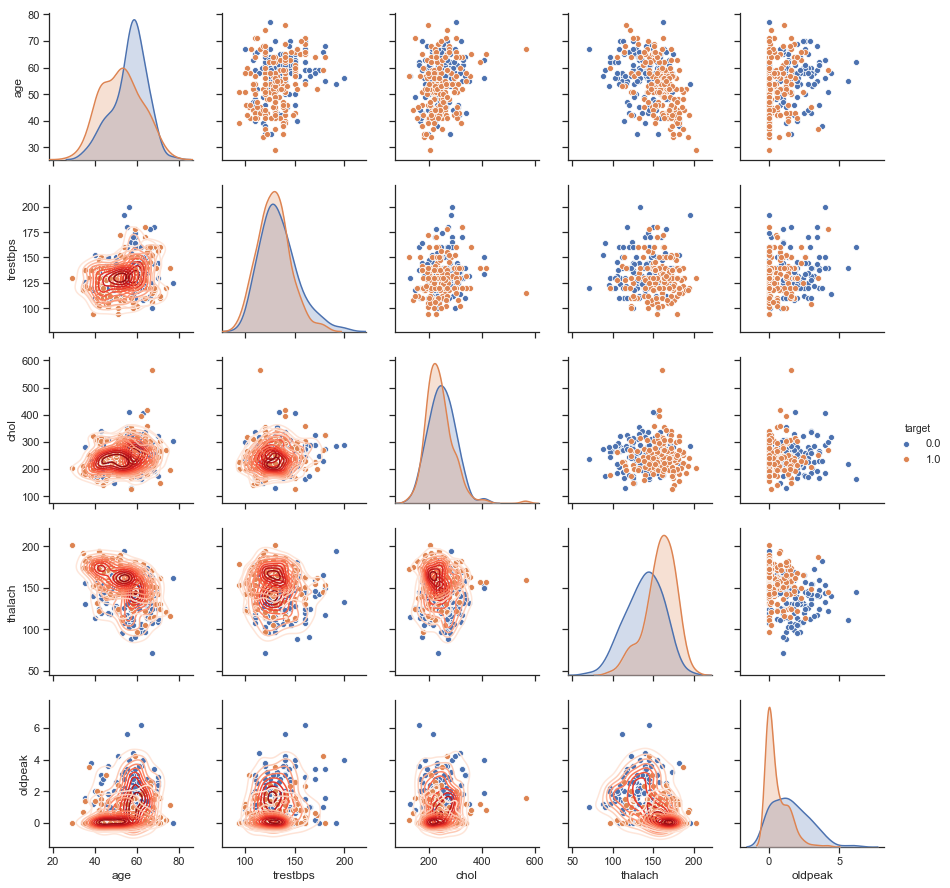

In [53]:

#pull continuous numeric data
continuous_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak', 'target']

#changing to type float
df[continuous_features] = df[continuous_features].astype(np.float64)

#matrix for continuous numeric data broken by heart disease presense, 1= yes 0=no
sns.set(style="ticks")
grid = sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach','oldpeak'], hue="target")
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

When our data is broken into two groups, consisting of those with evidence of heart disease and without we see overlapping in attributes and also see noticable differences. The matrix above contains the continuous variables from our original 13 explanatory variables. 


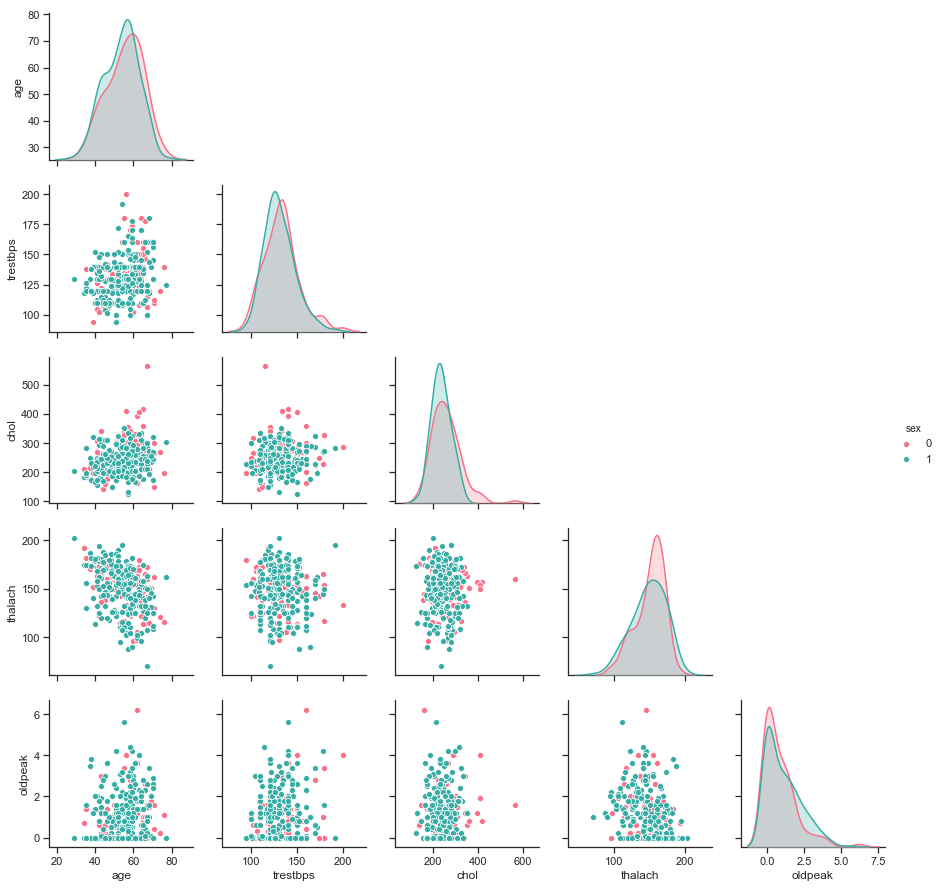

In [51]:
#matrix broken down by gender, 1=male 0=female

sex = sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach','oldpeak'], hue="sex", palette="husl")
for i, j in zip(*np.triu_indices_from(sex.axes, 1)):
    sex.axes[i, j].set_visible(False)

### New Features

The data set used is originally from the UCI machine learning respository. The kaggle version, which we used,  is a simplified data set with reduced explanatory and response variables. The original repository has four different levels for our response, and not limited to heart disease presence only, or a simple discrete binary value. Adding additional response measures we can get a better picture of what contributes to the heart disease at different levels. 


### Exceptional Work

In [20]:

#splitting data into test and training sets, 30-70 split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], train_size=.7,test_size=0.30, 
                                                    )
#train and predict
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

#results

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        38
           1       0.80      0.91      0.85        53

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.79      0.80        91
weighted avg       0.82      0.81      0.81        91

